In [2]:
import numpy as np
import matplotlib.pyplot as plt

import deeptrack as dt

In [6]:
nsize = 64

In [13]:
optics=dt.Brightfield(wavelength=532e-9,resolution=100e-9,maginifaction=1,output_region=(0,0,nsize,nsize),return_field=True)

Volume=np.zeros((nsize,nsize,nsize))
x,y,z=np.meshgrid(np.linspace(-1,1,nsize),np.linspace(-1,1,nsize),np.linspace(-1,1,nsize))

Volume=.01*np.exp(-(x**2+y**2+z**2)*10)+0j


volume = dt.Image(Volume)
limits = np.array([[0, nsize], [0, nsize], [0, nsize]])
fields = np.array([np.ones((nsize//2, nsize//2), dtype=complex)])
properties = optics.properties()
filtered_properties = {
     k: v for k, v in properties.items()
     if k in {'padding', 'output_region', 'NA', 
              'wavelength', 'refractive_index_medium','return_field'}
}


(64, 64, 1)


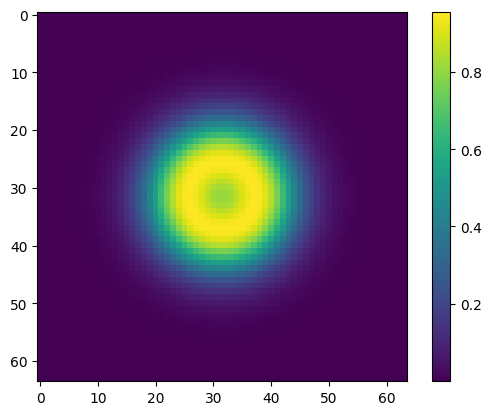

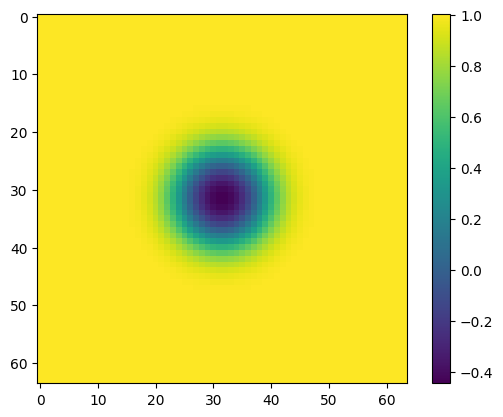

In [14]:
image = optics.get(volume, limits, fields, **filtered_properties)
print(image.shape)
plt.imshow(image.imag)
plt.colorbar()
plt.show()
plt.imshow(image.real)
plt.colorbar()
plt.show()